<a href="https://colab.research.google.com/github/rizqyilmi/python-class/blob/main/Assignment_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [36]:
ls

Assignment-11.ipynb  contohdaun.jpg  datadaun/  nnmodel_scene/  Untitled0.ipynb


In [37]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [38]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("datadaun")
data = []
labels = []

[INFO] loading images...


In [39]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((128, 128))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [40]:
print(labels)

['gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1', 'gambar1'

In [41]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [42]:
print(labels)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [43]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(446, 128, 128, 3)
(149, 128, 128, 3)


In [44]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(128,128,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 126, 126, 8)       224       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 8)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 61, 61, 16)        1168      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 14400)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               1440100   
_________________________________________________________________
dense_5 (Dense)              (None, 5)                

In [45]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [46]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
14/14 [==============================] - 4s 255ms/step - loss: 1.5649 - accuracy: 0.2915 - val_loss: 1.3949 - val_accuracy: 0.5034
Epoch 2/25
14/14 [==============================] - 3s 248ms/step - loss: 1.2841 - accuracy: 0.4821 - val_loss: 1.2225 - val_accuracy: 0.5906
Epoch 3/25
14/14 [==============================] - 3s 249ms/step - loss: 0.9923 - accuracy: 0.6637 - val_loss: 1.0199 - val_accuracy: 0.6510
Epoch 4/25
14/14 [==============================] - 3s 249ms/step - loss: 0.7799 - accuracy: 0.7556 - val_loss: 0.9170 - val_accuracy: 0.6913
Epoch 5/25
14/14 [==============================] - 3s 250ms/step - loss: 0.6185 - accuracy: 0.8027 - val_loss: 1.0693 - val_accuracy: 0.5906
Epoch 6/25
14/14 [==============================] - 3s 249ms/step - loss: 0.5388 - accuracy: 0.8318 - val_loss: 0.8192 - val_accuracy: 0.7248
Epoch 7/25
14/14 [==============================] - 4s 252ms/step - loss: 0.3834 - accuracy: 0.8969 - val_loss: 0.8027 - val_accuracy: 0.6980
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


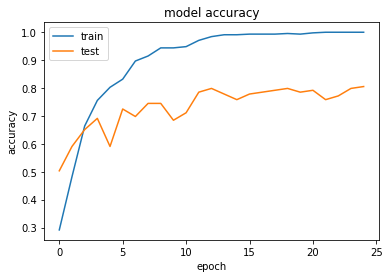

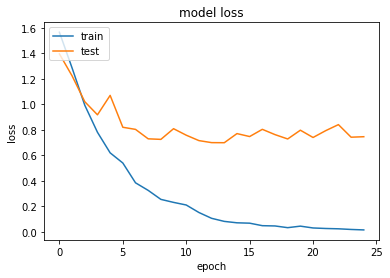

In [47]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [48]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

     gambar1       0.85      0.79      0.81        28
     gambar2       0.85      0.92      0.88        25
     gambar3       0.68      0.75      0.71        28
     gambar4       0.89      0.86      0.87        28
     gambar5       0.79      0.75      0.77        40

    accuracy                           0.81       149
   macro avg       0.81      0.81      0.81       149
weighted avg       0.81      0.81      0.81       149



In [49]:
model1.save('nnmodel_scene')

INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [50]:
import cv2
import matplotlib.pyplot as plt
image1='contohdaun.jpg'

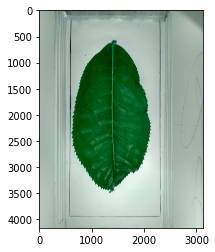

In [51]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [52]:
image_testing = Image.open('contohdaun.jpg')
image_testing = np.array(image_testing.resize((128, 128))) / 255.0
image_testing.shape

(128, 128, 3)

In [53]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 128, 128, 3)


In [55]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[8.1839557e-05 2.6455584e-07 3.2545690e-04 1.3388286e-10 9.9959248e-01]]
['gambar5']
